In [16]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [17]:
#This function finds the final velocities of the two blocks undergoing nonrelativistic, head on elastic collision using conservation of linear momentum and the fact that coeffifient of restitution is unity for a perfectly elastic collision

def collision(m,v1,v2):
    f1 = (2*m*v2 - (m-1)*v1)/(m+1)
    f2 = ((m-1)*v2 + 2*v1)/(m+1)
    return f1,f2

In [18]:
#This function finds the final velocities of the two blocks 
#undergoing relativistic, head on elastic collision 
#using conservation of relativistic 3-momentum and total energy

c = 3e8
def relativistic_collision(m,v1,v2): #relativistic elastic collision
    x1 = v1/sqrt(c**2-v1**2)
    x2 = v2/sqrt(c**2-v2**2)
    #we have applied the substitution x = v/sqrt(c^2-v^2) to simplify the conservation equations
    
    a = x1+m*x2                           #initial momentum
    b = sqrt(x1**2+1) + m*sqrt(x2**2+1)   #initial energy
    
    #calculation for v1f
    x1f = a*(1-(m*m-1)/(b*b-a*a)) - x1  
    # a*(1-(m*m-1)/(b*b-a*a)) represents the sum of roots of the quadratic equation for g1f. Derived on paper.
    
    v1f = c*sqrt(1-1/(1+x1f**2))
    if x1f<0:
        v1f*=-1
    
    #calculation for v2f
    x2f = (a - x1f)/m
    v2f = c*sqrt(1-1/(1+x2f**2))
    if x2f<0:
        v2f*=-1
    
    return v1f, v2f

In [70]:
# This function generates the points for the phase plot.
def phase_points_generator(case):
    m = float(input("Enter mass of right block: "))
    v = float(input("Enter initial speed of right block (as a percentage of the speed of light): "))*c/100
    # mass of left block is taken as unity.
    # velocity of left block is initially 0 and that of right block is -v.
    
    v1 = [0.0]
    v2 = [-v]
    x1 = [1.0]
    x2 = [2.0]
    t = []
    total_time = 0
    N = 0
    # N will store total number of collisions.
    state = 1
    # if state=0 then left block is moving leftwards else it is moving rightwards.

    while not (v1[N] >= 0 and v2[N] > 0 and v1[N]<=v2[N]): # argument is condition for blocks to never collide again
        if state==1:
            if case==0:
                V = collision(m,v1[N],v2[N])
            else:
                V = relativistic_collision(m,v1[N],v2[N])
            
            v1.append(V[0])
            v2.append(V[1])
        
            t.append((x2[N]-x1[N])/(v1[N]-v2[N]))
            total_time += t[N]
            x = x1[N] + v1[N]*t[N]
            x1.append(x)
            x2.append(x)
        
            N += 1
            state = 1-state
            
        else:
            v1.append(-v1[N])
            v2.append(v2[N])
        
            t.append(-x1[N]/v1[N])
            total_time += t[N]
            x = x2[N] + v2[N]*t[N]
            x1.append(0)
            x2.append(x)
        
            N += 1
            state = 1-state
        
    velocity1 = np.array(v1)
    velocity2 = np.array(v2)

    print("Total number of collisions = ", N)
    
    return velocity1, velocity2, N

In [112]:
def static_plot(x,y,N,case):
    if case==0:
        plt.title("Non-Relativistic Phase Plot", fontsize=35)
    else:
        plt.title("Relativistic Phase Plot", fontsize=35)
        
    plt.text(5/4*max(x), 0, f'Number of collisions = {N}', fontsize=25)
    plt.xlabel('v$_2$', fontsize=30)   
    plt.ylabel('v$_1$', fontsize=30) 
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.plot(x[0],y[0],"ro", label = "Initial state")
    plt.plot(x[N],y[N],"ko", label = "Final state")
    plt.legend(loc = "upper left")
    plt.plot(x,y)
    plt.show()

Enter mass of right block: 100
Enter initial speed of right block (as a percentage of the speed of light): 0.01
Total number of collisions =  31


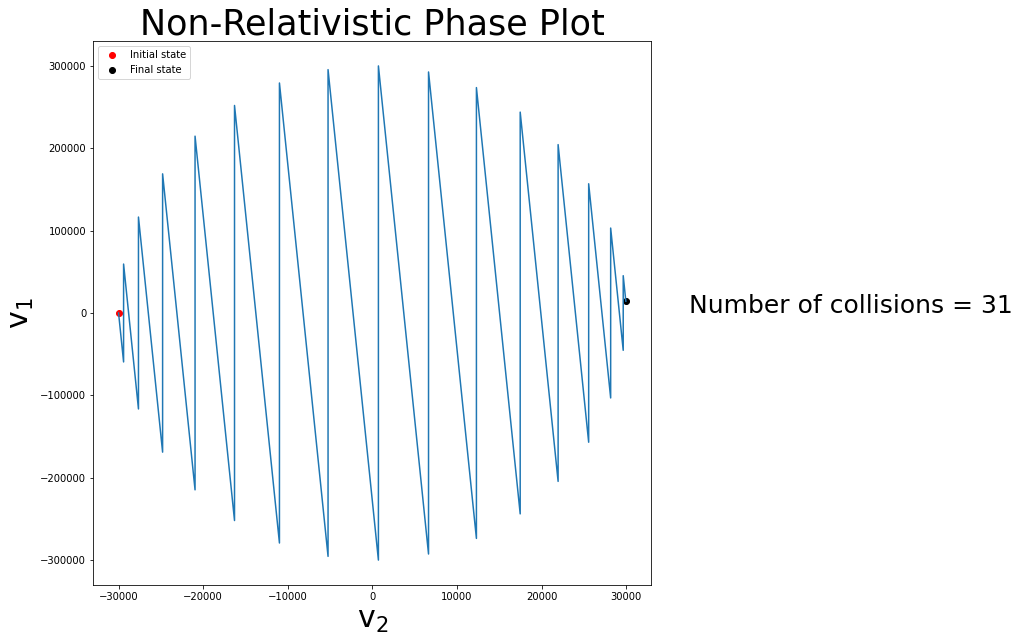

In [119]:
coordinates = phase_points_generator(0)
static_plot(coordinates[1],coordinates[0],coordinates[2],0)

Enter mass of right block: 10000
Enter initial speed of right block (as a percentage of the speed of light): 10
Total number of collisions =  118


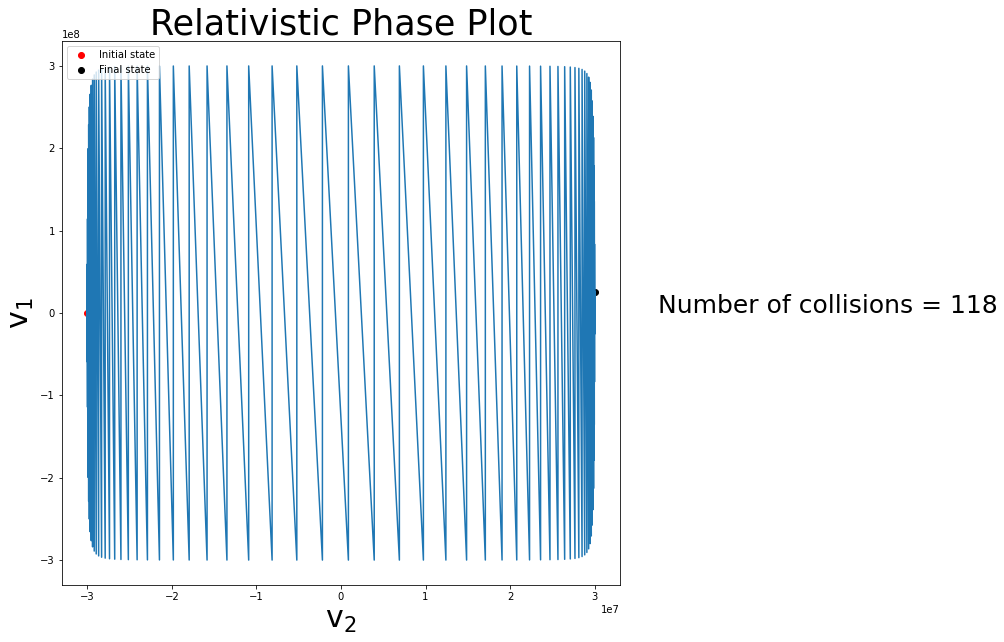

In [121]:
coordinates = phase_points_generator(1)
static_plot(coordinates[1],coordinates[0],coordinates[2],1)